In [71]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
stock = 'META'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [73]:
price = data['Close']
price

Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2023-05-12    233.809998
2023-05-15    238.860001
2023-05-16    238.820007
2023-05-17    242.490005
2023-05-18    246.850006
Name: Close, Length: 2768, dtype: float64

<Axes: xlabel='Date'>

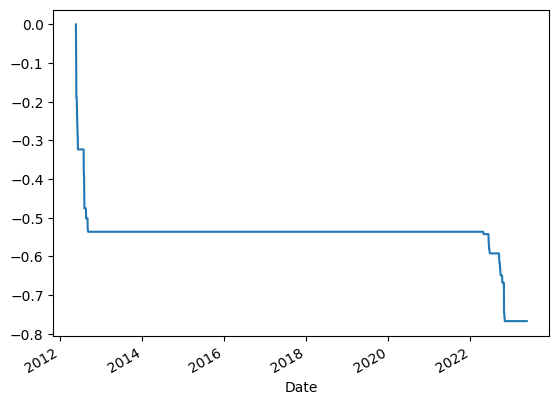

In [74]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [75]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -76.73609153644647 %


In [76]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.        ,  0.        , ..., -0.00016743,
        0.01536721,  0.01798013])

In [77]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.        , 1.        , ..., 6.24692676, 6.34292462,
       6.4569712 ])

In [78]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 645.697120217845%


In [79]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2012-12-31         NaN
2013-12-31    1.052968
2014-12-31    0.427630
2015-12-31    0.341451
2016-12-31    0.099274
2017-12-31    0.533768
2018-12-31   -0.257112
2019-12-31    0.565718
2020-12-31    0.330865
2021-12-31    0.231330
2022-12-31   -0.642218
2023-12-31    1.051272
Freq: A-DEC, Name: Close, dtype: float64

In [80]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2012-05-31         NaN
2012-06-30    0.050676
2012-07-31   -0.301929
2012-08-31   -0.168125
2012-09-30    0.199336
                ...   
2023-01-31    0.237909
2023-02-28    0.174330
2023-03-31    0.211501
2023-04-30    0.133906
2023-05-31    0.027172
Freq: M, Name: Close, Length: 133, dtype: float64

In [81]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 33.95404428451722%


In [82]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 23.872666648954958


In [83]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2012-07-31   -0.301929
2012-08-31   -0.168125
2012-10-31   -0.025392
2012-12-31   -0.049286
2013-02-28   -0.120400
2013-03-31   -0.061284
2013-05-31   -0.123154
2013-10-31   -0.000398
2013-11-30   -0.063732
2014-03-31   -0.120070
2014-04-30   -0.007636
2014-10-31   -0.051240
2015-01-31   -0.027044
2015-04-30   -0.041961
2015-08-31   -0.048718
2016-02-29   -0.047144
2016-06-30   -0.038128
2016-11-30   -0.095962
2016-12-31   -0.028458
2017-06-30   -0.003169
2017-09-30   -0.006396
2017-11-30   -0.015995
2017-12-31   -0.004064
2018-02-28   -0.045856
2018-03-31   -0.103914
2018-07-31   -0.111877
2018-09-30   -0.064132
2018-10-31   -0.077040
2018-11-30   -0.073654
2018-12-31   -0.067705
2019-02-28   -0.031436
2019-05-31   -0.082368
2019-08-31   -0.044071
2019-09-30   -0.040879
2020-01-31   -0.016273
2020-02-29   -0.046754
2020-03-31   -0.133371
2020-09-30   -0.106753
2020-12-31   -0.013756
2021-01-31   -0.054291
2021-02-28   -0.002748
2021-09-30   -0.105409
2021-10-31   -0.046613
2022-0

In [84]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 36.152372401092364
